C:\Users\Naboth Demetrius\AppData\Local\Temp\ipykernel_20764\157767395.py:39: RuntimeWarning: divide by zero encountered in log
  plt.subplot(2, 2, 4), plt.imshow(np.log(np.abs(f_transform_shifted_filtered)), cmap='gray')


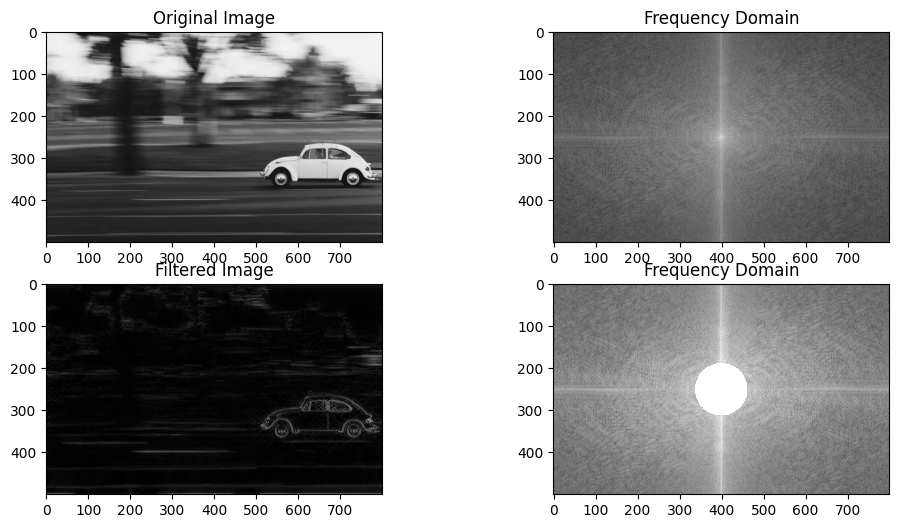

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.png', 0)  # Load in grayscale

# Transform to frequency domain
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Add specific frequency (for demonstration, add a sinusoidal component)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
# f_transform_shifted[crow, ccol] += 5000  # Adding a frequency component

# Create a notch filter to remove the added frequency
radius = 60  # Radius of the notch
mask = np.ones((rows, cols), np.uint8)
center = (ccol,crow) # Notch filter area
mask = cv2.circle(mask, center, radius, 0, -1)

# Apply the notch filter
f_transform_shifted_filtered = f_transform_shifted * mask

# Transform back to spatial domain
f_transform_ishift = np.fft.ifftshift(f_transform_shifted_filtered)
img_back = np.fft.ifft2(f_transform_ishift)
img_back = np.abs(img_back)

# Display the images
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(np.log(np.abs(f_transform_shifted)), cmap='gray')
plt.title('Frequency Domain')
plt.subplot(2, 2, 3), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image')
plt.subplot(2, 2, 4), plt.imshow(np.log(np.abs(f_transform_shifted_filtered)), cmap='gray')
plt.title('Frequency Domain')
plt.show()
